# X-ray Image Classification

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# setting the training data directory
DataDir = r"/content/drive/MyDrive/chest_xray/train/"

In [15]:
# intiallizing the category of classification
CATEGORIES = ["NORMAL", "PNEUMONIA"]

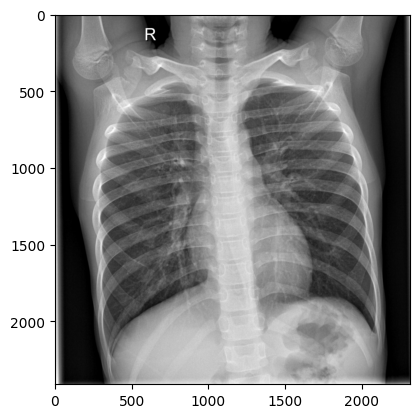

In [16]:
# converting the images into grayscale
for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [17]:
# intializing the size of the image so that every image should be in same dimension
img_size=100

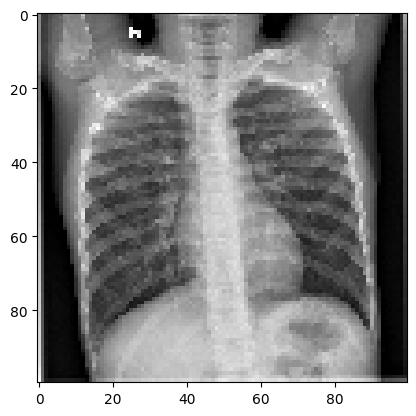

In [18]:
# image after resize and gray scale
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [19]:
training_data=[]

In [20]:
# defining the function for training data according to the categories converting the images into gray scale with resizing the image into 100 x 100
# converting it into numpy arrays
def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])

            except Exception as e:
                pass

In [21]:
create_training_data()

In [22]:
print(len(training_data))

4554


In [23]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[58, 59, 56, ..., 49, 52, 66],
       [76, 71, 63, ..., 45, 47, 68],
       [97, 76, 69, ..., 50, 45, 49],
       ...,
       [ 6, 39, 48, ..., 55, 43, 29],
       [ 5, 38, 46, ..., 65, 55, 29],
       [ 5, 36, 49, ..., 94, 58, 39]], dtype=uint8), 1]
[array([[148, 160, 165, ...,  31,  52, 208],
       [145, 154, 161, ...,   0,  44, 198],
       [165, 158, 147, ...,   2,  46, 200],
       ...,
       [  9,   6,  10, ...,   1,   2,  52],
       [  1,   2,   2, ...,   1,   2,  48],
       [ 20, 211,   2, ...,   1,   2,  51]], dtype=uint8), 1]
[array([[66, 70, 71, ..., 33, 33, 32],
       [73, 75, 82, ..., 32, 33, 32],
       [79, 90, 93, ..., 31, 32, 31],
       ...,
       [52, 52, 52, ..., 50, 52, 51],
       [52, 52, 51, ..., 50, 51, 51],
       [52, 52, 51, ..., 51, 51, 51]], dtype=uint8), 1]
[array([[ 0,  0, 10, ...,  0,  0,  0],
       [ 0,  0,  6, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..

In [24]:
X=[]
y=[]

In [25]:
# spliting the features and labels
for features,label in training_data:
    X.append(features)
    y.append(label)

In [26]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[58]
   [59]
   [56]
   ...
   [49]
   [52]
   [66]]

  [[76]
   [71]
   [63]
   ...
   [45]
   [47]
   [68]]

  [[97]
   [76]
   [69]
   ...
   [50]
   [45]
   [49]]

  ...

  [[ 6]
   [39]
   [48]
   ...
   [55]
   [43]
   [29]]

  [[ 5]
   [38]
   [46]
   ...
   [65]
   [55]
   [29]]

  [[ 5]
   [36]
   [49]
   ...
   [94]
   [58]
   [39]]]]


In [27]:
y = np.array(y)

In [28]:
# reshapping the features for making it compatible with tensorflow
X = np.array(X).reshape(-1,img_size,img_size,1)

In [36]:
# as we do for training data similiarly doing with validation data
validation_data=[]
DataDir_val= r"/content/drive/MyDrive/chest_xray/val/"

In [37]:
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir_val,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])

            except Exception as e:
                pass

In [38]:
create_validating_data()
print(len(validation_data))

16


In [39]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[  0,   8,  24, ...,  65,  61, 103],
       [  0,   3,  23, ...,  67,  59, 121],
       [  1,   0,  18, ...,  61,  58, 123],
       ...,
       [  2,   2,   2, ...,   1,   2,   2],
       [  2,   2,   2, ...,   1,   2,   2],
       [  2,   2,   2, ...,   1,   2,   2]], dtype=uint8), 1]
[array([[  0,   0,   0, ...,   6,   6,   6],
       [  0,   0,   0, ...,   6,   6,   6],
       [  0,   0,   0, ...,   6,   6,   6],
       ...,
       [  3,   3,   3, ..., 222,  51,   7],
       [  3,   3,   3, ..., 190,  58,  10],
       [  3,   4,   4, ...,  48,  14,   9]], dtype=uint8), 1]
[array([[  0,  20,  15, ...,  10,  14,  15],
       [239,  19,  15, ...,  12,  13,  14],
       [ 21,  18,  15, ...,  11,  14,  15],
       ...,
       [ 30,  33,  31, ...,  35,  32,  32],
       [ 32,  34,  29, ...,  35,  32,  27],
       [ 44,  33,  31, ...,  37,  30,  27]], dtype=uint8), 0]
[array([[  2, 107,  75, ...,   0,   3,  10],
       [ 59, 105,  51, ...,   2,   0,  21],
       [122,  96,  15, ...

In [40]:
X_val=[]
y_val=[]

In [41]:
for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)

In [42]:
y_val = np.array(y_val)
X_val=np.array(X_val).reshape(-1,img_size,img_size,1)

In [43]:
# importing the library for training the model and adding the neural network layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten, Conv2D,MaxPooling2D
import pickle

In [44]:
# Pixels value ranges from 0 to 255, 0 means black, 255 means white....
# In order to scale it down to a scale of 0 to 1, we are performing this step
X = X/255.0
x_val = X_val/255.0

In [45]:
X.shape

(4554, 100, 100, 1)

In [46]:
x_val.shape

(16, 100, 100, 1)

In [47]:
# intializing the neural network layer for training the model
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
# fittting the model with 10 epochs and using the validation data we have created
model.fit(X,y,batch_size=4,epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8733 - loss: 0.4406 - val_accuracy: 0.6875 - val_loss: 1.0124
Epoch 2/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9416 - loss: 0.1713 - val_accuracy: 0.8125 - val_loss: 0.4865
Epoch 3/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9607 - loss: 0.1187 - val_accuracy: 0.7500 - val_loss: 0.6628
Epoch 4/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9575 - loss: 0.1165 - val_accuracy: 0.8750 - val_loss: 0.4472
Epoch 5/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9706 - loss: 0.0807 - val_accuracy: 0.8750 - val_loss: 0.5796
Epoch 6/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9728 - loss: 0.0705 - val_accuracy: 0.6250 - val_loss: 1.4664
Epoch 7/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9704 - loss: 0.0745 - val_accuracy: 0.6250 - val_loss: 1.3418
Epoch 8/10
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9732 - loss: 0.0680 

In [51]:
# saving the model
model.save(r"/content/drive/MyDrive/chest_xray/model_10.h5")

In [52]:
# importing the library for testing the model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

In [53]:
CATEGORIES = ["NORMAL", "PNEUMONIA"]

In [54]:
# function for preparing the image for predicting the class
def prepare(image):
    img_size=100
    #img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    img=tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,1)

In [55]:
model = tf.keras.models.load_model("/content/drive/MyDrive/chest_xray/model_10.h5")

In [64]:
image = r'/content/drive/MyDrive/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'

In [65]:
prediction=model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.9940249]]
1
PNEUMONIA


In [66]:
image2 = r'/content/drive/MyDrive/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg'

In [67]:
prediction=model.predict([prepare(image2)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.39250937]]
0
NORMAL


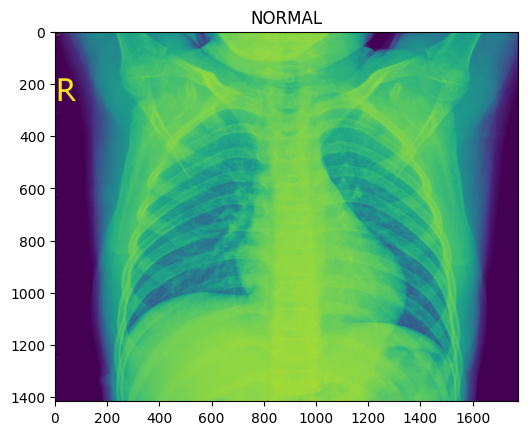

In [68]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()

In [70]:
# importing necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model

# set the path for test data
test_dir = "/content/drive/MyDrive/chest_xray/test"

# define categories
CATEGORIES = ["NORMAL", "PNEUMONIA"]

# set image size
img_size = 100

# load the saved model
model = load_model('/content/drive/MyDrive/chest_xray/model_10.h5')

# initialize lists for storing test data
X_test = []
y_test = []

# loop through the test data directory and extract the images and their labels
for category in CATEGORIES:
    path = os.path.join(test_dir, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            X_test.append(new_array)
            y_test.append(class_num)
        except Exception as e:
            pass

# convert test data to numpy arrays
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# normalize test data
X_test = X_test / 255.0

# calculate test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# print test accuracy
print('Test accuracy:', test_acc)


18/18 - 2s - 134ms/step - accuracy: 0.6957 - loss: 1.7530
Test accuracy: 0.695652186870575


## Pre-Trained Models

In [71]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define image size
img_size = 100

# load the pre-trained model (VGG16)
base_model = VGG16(input_shape=(img_size,img_size,3), include_top=False, weights='imagenet')

# freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# define the image generators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# specify the training and validation data directories
train_dir = '/content/drive/MyDrive/chest_xray/train'
val_dir = '/content/drive/MyDrive/chest_xray/val'

# create the image generators for training and validation data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary')

# train the model
model.fit(train_generator, epochs=10, validation_data=val_generator)

# evaluate the model on test data
test_dir = '/content/drive/MyDrive/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Found 4843 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 95s 581ms/step - accuracy: 0.8806 - loss: 0.2875 - val_accuracy: 0.6875 - val_loss: 0.5421
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 73s 478ms/step - accuracy: 0.9432 - loss: 0.1414 - val_accuracy: 0.7500 - val_loss: 0.4654
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 69s 452ms/step - accuracy: 0.9477 - loss: 0.1359 - val_accuracy: 0.7500 - val_loss: 0.8271
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 70s 461ms/step - accuracy: 0.9502 - loss: 0.1253 - val_accuracy: 0.8125 - val_loss: 0.3310
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 70s 457ms/step - accuracy: 0.9524 - loss: 0.1200 - val_accuracy: 0.7500 - val_loss: 0.6316
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 70s 460ms/step - accuracy: 0.9602 - loss: 0.1090 - val_accuracy: 0.8125 - val_loss: 0.4029
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 70s 460ms/step - accuracy: 0.9627 - loss: 0.1095 - val_accuracy: 0.7500 - val_loss: 0.6067
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 70s 463ms/step - accuracy: 0.9532 - loss: 0

In [72]:
# saving the pre-trained model
model.save(r"/content/drive/MyDrive/chest_xray/custom_pre_trained_model_10.h5")

In [74]:
model = tf.keras.models.load_model("/content/drive/MyDrive/chest_xray/custom_pre_trained_model_10.h5")

In [75]:
model.summary()

Model: "functional_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,935,811 (60.79 MB)

 Trainable params: 1,221,121 (4.66 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [76]:
# evaluate the model on test data
test_dir = '/content/drive/MyDrive/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step - accuracy: 0.7379 - loss: 0.9132
Test accuracy: 0.8381410241127014
